In [14]:
import numpy as np;
def ChebDiff(N):
    g = np.linspace(0,1,N+1);
    x = np.cos(np.pi*g);
    D = np.zeros((N+1,N+1));
    D[0][0] = (2*N*N+1)/6;
    D[N][N] = -D[0][0];
    for j in range(1,N):
        D[j][j] = -0.5*x[j]/(1-x[j]*x[j]);
    c = np.ones(N+1);
    c[0] = 2;
    c[N] = 2;
    for i in range(0,N+1):
        for j in range(0,i):
            D[i][j] = c[i]/c[j]*(-1)**(i+j)/(x[i]-x[j]);
        for j in range(i+1,N+1):
            D[i][j] = c[i]/c[j]*(-1)**(i+j)/(x[i]-x[j]);
    return D,x;

In [15]:
import numpy as np;
def myfunction(x):
    # exp(x)sin(5x);
    f = np.exp(x)*np.sin(5*x);
    fprime = (np.exp(x)*np.sin(5*x)+5*np.exp(x)*np.cos(5*x));
    return f,fprime;

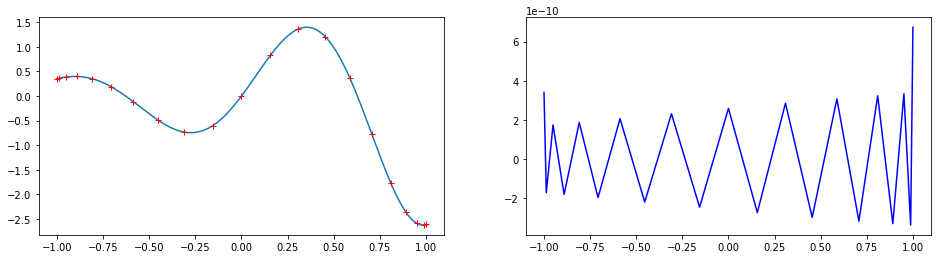

In [16]:
N = 20;
[D,x] = ChebDiff(N);
[f,fprime] = myfunction(x);
Df = D.dot(f);
error = Df-fprime;
np.amax(np.abs(error))
nplot = 1001;
xplot = np.linspace(-1,1,nplot);
[fplot,fplotprime] = myfunction(xplot);
import matplotlib.pyplot as plt;
fig, ax = plt.subplots(nrows=1, ncols=2);
ax[0].plot(xplot,fplot);
ax[0].plot(x,f,'r+');
ax[1].plot(x,error,'b-');
plt.rcParams["figure.figsize"] = [16,4];
plt.show();

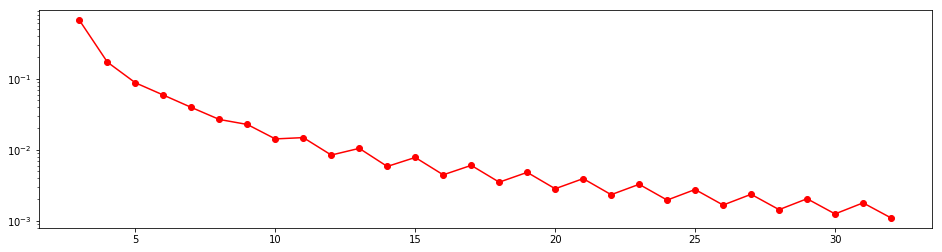

In [17]:
Nmax = 30;
E = np.zeros(Nmax);
Nrange = np.arange(3,3+Nmax);
for N in Nrange:
    [D,x] = ChebDiff(N);
    # First example
    v = np.abs(x)**3;
    vprime = 3*x*np.abs(x);
#     # Second example
#     v = np.exp(-1/x**2);
#     vprime = 2*v/x**3;
#     # Third example
#     v = 1/(1+x**2);
#     vprime = -2*x*v**2;
#     # Fourth example
#     v = x**10;
#     vprime = 10*x**9;
    
    E[N-3] = np.max(np.abs(D.dot(v)-vprime));

import matplotlib.pyplot as plt;
plt.semilogy(Nrange,E,'ro-');
plt.rcParams["figure.figsize"] = [16,4];
plt.show();

$\newcommand{\bkt}[1]{\left(#1\right)}$

We have defined the Chebyshev differentiation matrix $D_N$ and have seen how to compute the derivative using it. In this chapter, we illustrate how such matrices can be used to solve some boundary value problems arising in ordinary and partial differential equations.

As our first example, consider the ODE boundary value problem
$$u_{xx} = e^{4x}, -1 < x < 1 \text{ and }u\bkt{\pm 1} = 0$$

The exact solution is given by
$$u(x) = \dfrac{e^{4x}-x\sinh(4)-\cosh(4)}{16}$$

In [18]:
import matplotlib.pyplot as plt;
from ipywidgets import interact, widgets;
import numpy as np;


xplot = np.linspace(-1,1,1001);
u_exact = (np.exp(4*xplot)-xplot*np.sinh(4)-np.cosh(4))/16;

def solvePDE(N):
    x = np.zeros(N+1);
    D = np.zeros((N+1,N+1));
    [D,x] = ChebDiff(N);
    D_2 = D.dot(D);
    D2 = D_2[1:N,1:N];
    f = np.exp(4*x[1:N]);
    u_node = (np.exp(4*x)-x*np.sinh(4)-np.cosh(4))/16;
    u = np.linalg.solve(D2,f);
    v = np.zeros(N+1);
    v[1:N] = u;
    error = np.amax(np.abs(v-u_node));
#     display(u_node)
#     display(v)
    display(error);
    plt.plot(x,v,'r*');
    plt.plot(xplot,u_exact,'b-');
    plt.title("Exact solution versus computed solution");
    plt.xlabel("x");
    plt.ylabel("u(x)");
    plt.rcParams["figure.figsize"] = [16,4];
    plt.show();

interact(solvePDE, N=widgets.IntSlider(min=3,max=21,step=1,value=3));

A Jupyter Widget

In [19]:
def Lagrange(xnodes,x,i):
    f = 1;
    nnodes = np.size(xnodes);
    for j in range(0,i):
        f = f*(x-xnodes[j])/(xnodes[i]-xnodes[j]);
    for j in range(i+1,nnodes):
        f = f*(x-xnodes[j])/(xnodes[i]-xnodes[j]);
    return f;

In [29]:
import matplotlib.pyplot as plt;
from ipywidgets import interact, widgets;
import numpy as np;

nplot = 1001;
xplot = np.linspace(-1,1,nplot);
u_exact = (np.exp(4*xplot)-xplot*np.sinh(4)-np.cosh(4))/16;

def solvePDE(N):
    x = np.zeros(N+1);
    D = np.zeros((N+1,N+1));
    [D,x] = ChebDiff(N);
    D_2 = D.dot(D);
    D2 = D_2[1:N,1:N];
    u = np.zeros(N-1);
    change = 1;
    it = 0;
    while (change > 1e-15):
        unew = np.linalg.solve(D2,np.exp(u));
        change = np.max(np.abs(unew-u));
        u = unew;
        it = it+1;
    v = np.zeros(N+1);
    v[1:N] = u;
    vplot = np.zeros(nplot);
    for k in np.arange(0,N+1):
        vplot = vplot+v[k]*Lagrange(x,xplot,k);
    plt.plot(xplot,vplot,'r-');
    plt.plot(x,v,'k+');
    plt.title("Exact solution versus computed solution");
    plt.xlabel("x");
    plt.ylabel("u(x)");
    plt.rcParams["figure.figsize"] = [16,4];
    plt.show();
    display(it)

interact(solvePDE, N=widgets.IntSlider(min=2,max=21,step=1,value=3));

A Jupyter Widget

In [11]:
np.arange(0,4)

array([0, 1, 2, 3])